# Import all Required libaries

In [1]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from scipy import stats
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3



# Importing Dataset

In [2]:

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_00f5c14df33a4a429f58790dc2580d85 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CQJmbL9nmJxFwbbVRl7gyVOlSVLotDqmaVojLRHc2Puy',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_00f5c14df33a4a429f58790dc2580d85.get_object(Bucket='myproject-donotdelete-pr-jqjywilxpofymz',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

d = pd.read_csv(body)


# Reading and Analysing the Data

In [3]:
d.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
d.columns

Index([' Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Dropping and Renaming of columns

In [5]:
df=d.drop('Year',axis=1)
df.replace(to_replace=['Developing', 'Developed'],
           value= [0, 1], 
           inplace=True)
df.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Grouping the data by Country 

In [6]:
df=df.groupby(' Country').mean()
df.isnull().sum()


Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
dtype: int64

# Visualizing the data

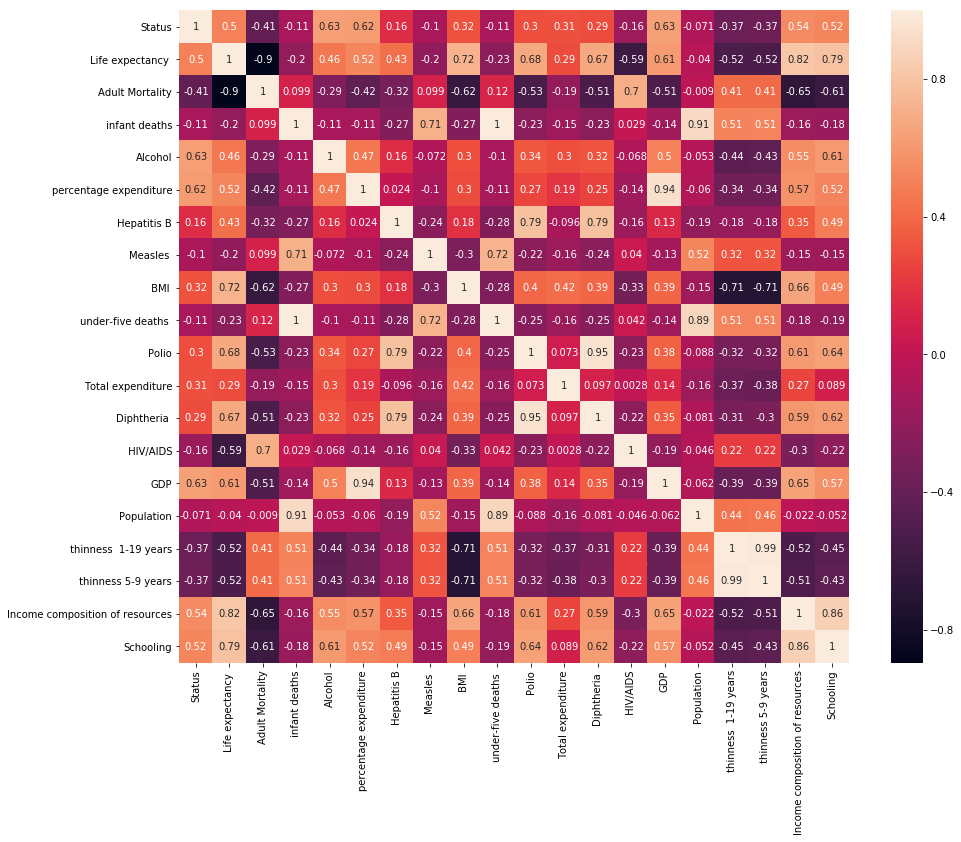

In [7]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), annot = True)

# Data preprocessing

In [8]:
#filling the empty place with average value

In [9]:

df.fillna(value = df.mean(), inplace = True)
X=df.drop(['Life expectancy '],axis=1)
Y=df['Life expectancy ']
df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Feature Scaling

In [10]:
min_max_scaler = MinMaxScaler() 
X = min_max_scaler.fit_transform(X)

# Splitting data set into train and test dataset

In [11]:
x_train,x_test,y_train,y_test=train_test_split(
        X,Y, train_size = 0.7, test_size = 0.3)

# Import random forest regressor model and train the model

In [12]:
model=RandomForestRegressor(n_estimators=40,random_state=50)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

# Accuracy

In [13]:
model.score(x_test,y_test)*100

92.37113561596323

In [14]:
random_forest_model_predict = model.predict(x_test)

# Errors

In [15]:
print("Mean Square Error: %.2f"% mean_squared_error(y_test, random_forest_model_predict))
print("Mean Absolute Error: %.2f"% mean_absolute_error(y_test, random_forest_model_predict))
print('Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,random_forest_model_predict)))

Mean Square Error: 8.30
Mean Absolute Error: 2.09
Root Mean Square Error 2.880266201318131


In [16]:
df.columns


Index(['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
y=pd.DataFrame({'Status':[0],'Adult Mortality':[263], 'infant deaths':[62], 'Alcohol':[0.01],
       'percentage expenditure':[71.27962362], 'Hepatitis B':[65], 'Measles ':[1154], ' BMI ':[19.1],
       'under-five deaths ':[83], 'Polio':[6], 'Total expenditure':[8.16], 'Diphtheria ':[65],
       'HIV/AIDS':[0.1], 'GDP':[584.25921], 'Population':[33736494], ' thinness  1-19 years':[17.2],
       ' thinness 5-9 years':[17.3], 'Income composition of resources':[0.479], 'Schooling':[10.1],})
prediction=model.predict(y)
print(prediction)

[59.63640625]


In [18]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':random_forest_model_predict})
print(df.head(25))

                                                       Actual  Predicted
 Country                                                                
Samoa                                               73.618750  71.966717
Lithuania                                           72.806250  75.238750
Uganda                                              55.706250  55.029844
Congo                                               59.043750  55.775000
Iceland                                             82.443750  80.855000
Cyprus                                              79.675000  78.035156
United Kingdom of Great Britain and Northern Ir...  80.793750  76.857969
Botswana                                            56.050000  59.549844
Mauritania                                          62.800000  61.678278
Tuvalu                                              69.224932  67.423098
Angola                                              49.018750  55.742969
Ecuador                                            

# Creation Of Endpoints

In [19]:
!pip install watson-machine-learning-client

In [20]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-14 18:36:38,466 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [21]:
wml_credentials={
  "apikey": "rxDQ00TQGVgqslBaz1sBG0-0Bo2Hulh4C3YSCb79KEk9",
  "instance_id": "4cc19d10-b8b5-4381-b60e-702137e18431",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [22]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [23]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Ramij", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "ramijnalpur@gmail.com", 
               client.repository.ModelMetaNames.NAME: "lifeExpectancy"}

In [24]:

model_artifact =client.repository.store_model(model, meta_props=model_props)

In [35]:
model_artifact

{'metadata': {'guid': '6b7ba03c-3b96-416b-aee0-b1785b49b0df',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4cc19d10-b8b5-4381-b60e-702137e18431/published_models/6b7ba03c-3b96-416b-aee0-b1785b49b0df',
  'created_at': '2020-06-14T18:36:38.666Z',
  'modified_at': '2020-06-14T18:36:38.717Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4cc19d10-b8b5-4381-b60e-702137e18431/published_models/6b7ba03c-3b96-416b-aee0-b1785b49b0df/learning_configuration',
  'author': {'name': 'Ramij'},
  'name': 'lifeExpectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4cc19d10-b8b5-4381-b60e-702137e18431/published_models/6b7ba03c-3b96-416b-aee0-b1785b49b0df/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4cc19d10-b8b5-4381-b60e-702137e18431/published_models/6b7ba03c-3b96-416b-aee0-b1785b49b0df/feedback',
  'latest_version': {'url': 'htt

In [36]:
guid = client.repository.get_model_uid(model_artifact)

In [37]:
guid

'6b7ba03c-3b96-416b-aee0-b1785b49b0df'

In [38]:
deployment = client.deployments.create(guid, name="lifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: '6b7ba03c-3b96-416b-aee0-b1785b49b0df' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e4ce9e47-ba0b-48ff-b95a-f71c7a81b436'
------------------------------------------------------------------------------------------------




In [39]:
client.deployments.list()

------------------------------------  --------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME            TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
e4ce9e47-ba0b-48ff-b95a-f71c7a81b436  lifeExpectancy  online  DEPLOY_SUCCESS  2020-06-14T18:38:33.572Z  scikit-learn-0.20  model
------------------------------------  --------------  ------  --------------  ------------------------  -----------------  -------------


In [41]:
#client.deployments.delete('5f972903-dc04-4180-95bf-68796188fa40')

In [42]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [43]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4cc19d10-b8b5-4381-b60e-702137e18431/deployments/e4ce9e47-ba0b-48ff-b95a-f71c7a81b436/online'